E:\Coding\PycharmProjects\Dreambooth\venv\lib\site-packages\transformers\models\clip\feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


  0%|          | 0/20 [00:00<?, ?it/s]

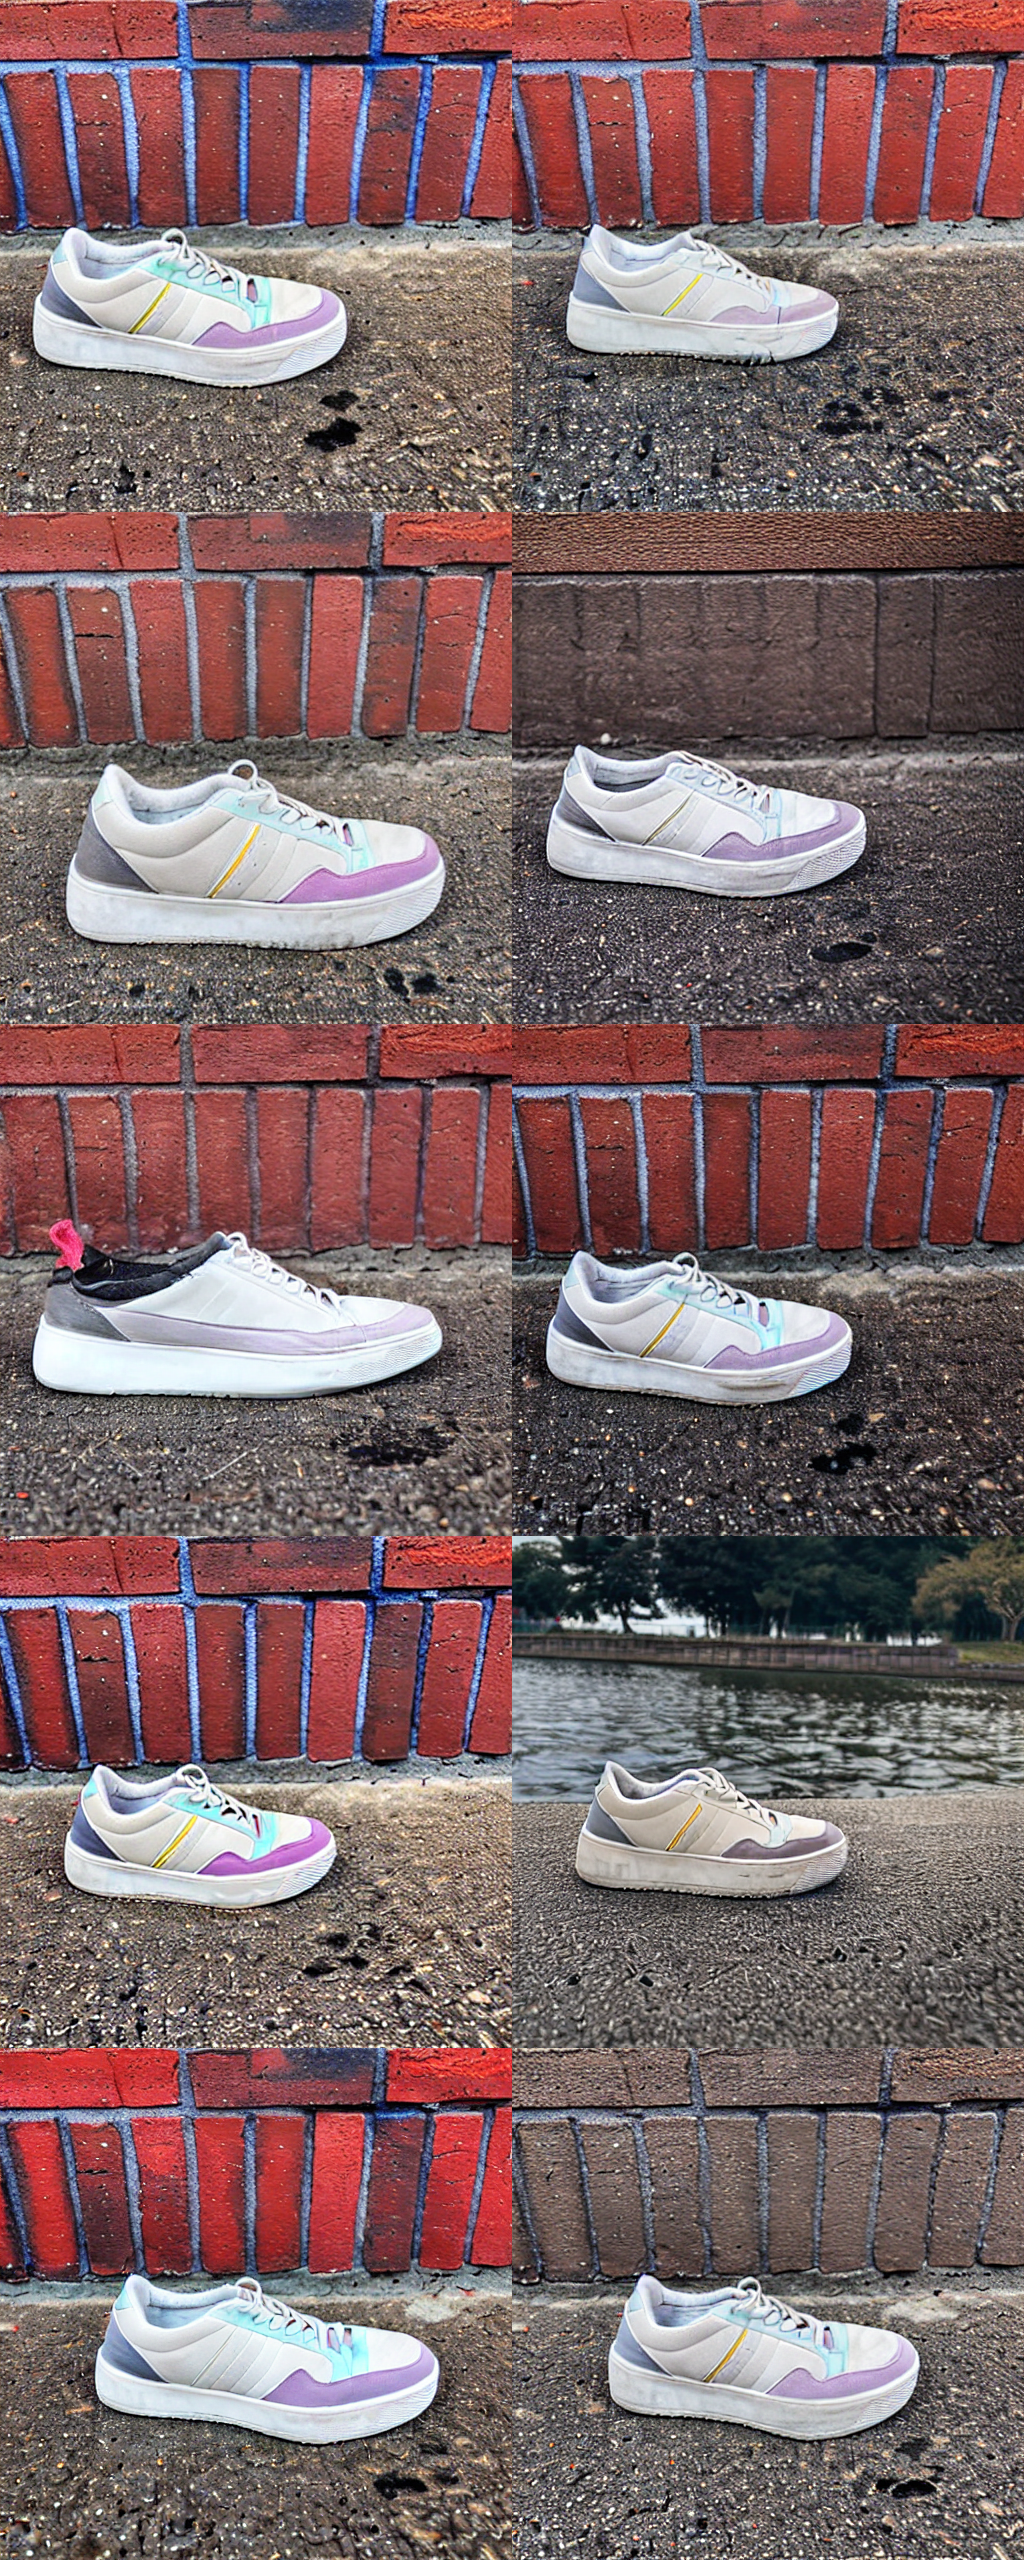

In [10]:
from diffusers import StableDiffusionPipeline, DDIMScheduler, PNDMScheduler, LMSDiscreteScheduler
import torch
from PIL import Image

def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))

    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid


model_id = "./datasets/cat_sneaker/output_frozen_te"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16).to("cuda")
#pipe.safety_checker = lambda images, clip_input: (images, False)
pipe.scheduler = DDIMScheduler.from_config(pipe.scheduler.config)
# pipe.scheduler = PNDMScheduler.from_config(pipe.scheduler.config)
# pipe.scheduler = LMSDiscreteScheduler.from_config(pipe.scheduler.config)


prompt = "sks cat next to zwx sneaker"
num_prompts = 10
images = pipe([prompt] * num_prompts, num_inference_steps=20, guidance_scale=7.5).images
for image_index, image in enumerate(images):
    image.save(f"./inference_outputs/{image_index}.png")

image_grid(images, 5, 2)